In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('AxlFolder/subsampled_E10-E14.csv')

In [16]:
data = data.fillna(0)
data.loc[data['sex'] == 'F', "sex"] = 2
data.loc[data['sex'] == 'M', "sex"] = 1
data.loc[data['sex'] == 'U', "sex"] = 3
data['sex'] = pd.to_numeric(data['sex'])

In [17]:
data

,p_id,age,v_o_id,sex,K73,H35,I65,J45,F30-F39,E66,...,C40-C41,C53,Z89,C43,C46,C56,C73,pred1y_E10-E14,years_with_diabetes,stratification
0,11,77,11_5,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,predicted_condition
1,23,63,23_4,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,predicted_condition
2,39,49,39_5,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,predicted_condition
3,43,52,43_5,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,no_condition
4,59,78,59_6,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,no_condition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,999752,74,999752_2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,no_condition
39996,999764,65,999764_2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,no_condition
39997,999771,66,999771_2,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,predicted_condition
39998,999780,72,999780_3,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,predicted_condition


In [18]:
data, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
data = data.drop('p_id', axis=1)
data_test = data_test.drop('p_id', axis=1)

data = data.drop('stratification', axis = 1) 
data_test = data_test.drop('stratification' , axis = 1)

data = data.drop('v_o_id', axis=1)
data_test = data_test.drop('v_o_id', axis=1)

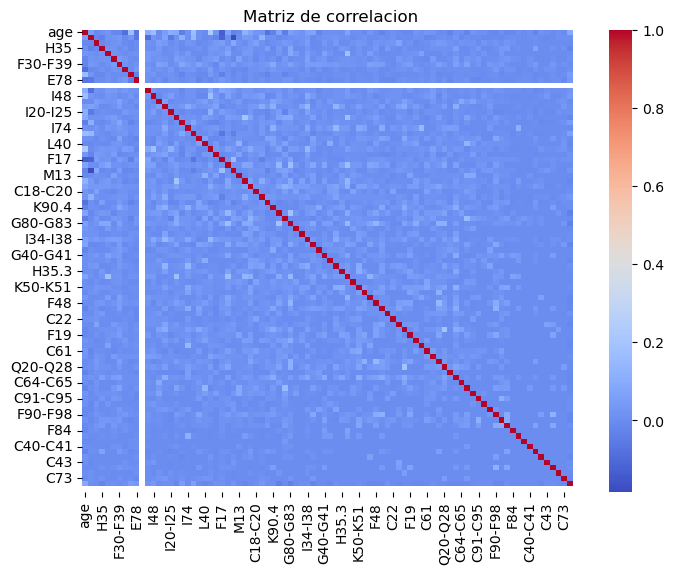

In [20]:
corr_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm',)
plt.title('Matriz de correlacion')
plt.show()

In [26]:
from sklearn.cluster import DBSCAN
X = data.drop('pred1y_E10-E14', axis=1)
dbscan = DBSCAN(eps=0.1 , min_samples = 5)
dbscan.fit(X)
labels = dbscan.labels_
data['cluster'] = labels

In [27]:
data

,age,sex,K73,H35,I65,J45,F30-F39,E66,I10-I15,E78,...,C40-C41,C53,Z89,C43,C46,C56,C73,pred1y_E10-E14,years_with_diabetes,cluster
14307,74,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1
17812,55,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
11020,75,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1
15158,54,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
24990,66,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,55,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1
11284,46,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,869
38158,73,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,39
860,80,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1


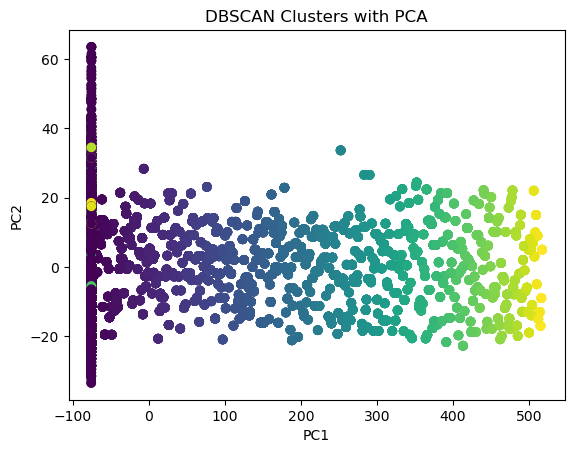

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters with PCA')
plt.show()

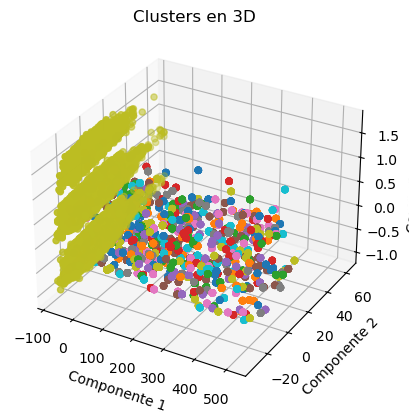

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in set(labels):
    mask = labels == label
    ax.scatter(X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2], label=f"Cluster {label}")

ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
ax.set_title("Clusters en 3D")
#plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['cluster'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('DBSCAN Clusters with t-SNE')
plt.show()